# 230968126 ML Week 7

Name :- Kewal Thacker Section :- A1

In [1]:
import pandas as pd
import numpy as np

# Exercise 1
1.	Use the German credit rating dataset “German Credit Data.csv” , Decision tree classifier to predict good or bad credit. Use “sklearn.model_selection”  and  GridSearchCV to search the hyperparameter values and report the most optimal one. Configure the grid search to search for optimal parameters:
•	Splitting criteria: gini or entropy.
•	Maximum depth of decision tree ranging from 2 to 10.
•	The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal parameter will be chosen based on ROC AUC score.


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn import tree
import graphviz

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [45]:
dataset = pd.read_csv("C:\\Users\\mca\\Desktop\\ML_Lab\\Week7\\German Credit Data.csv")
df = pd.DataFrame(dataset)
df

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [47]:
from sklearn.preprocessing import StandardScaler
df.fillna(df.median(), inplace = True)

C:\Users\mca\AppData\Local\Temp\ipykernel_24052\180366989.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace = True)


In [48]:
X = pd.get_dummies(df.drop('status', axis = 1))
y = df['status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [49]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : np.arange(2,11)
}
dt = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 4}


In [50]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.5826016089173984


2. Visualize the tree using graphviz toolkit.

Wasn't able to install graphviz so used sklearn

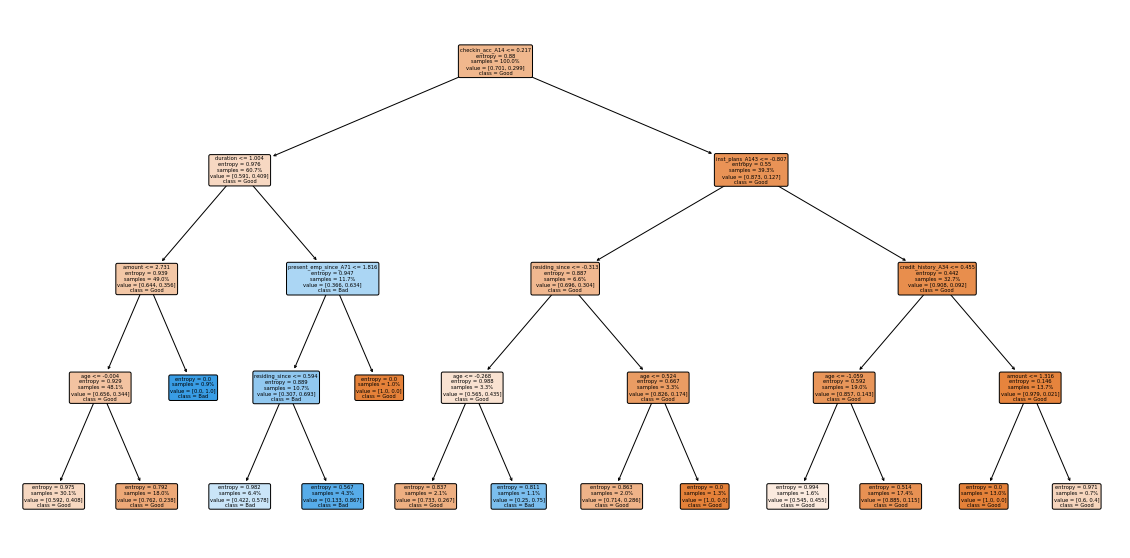

In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Good', 'Bad'], rounded=True, proportion=True)
plt.show()

3. Display the text representation of the rules learnt

In [22]:
print("Text representation of the decision tree: ")
print(tree.export_text(best_model, feature_names = list(X.columns)))

Text representation of the decision tree: 
|--- checkin_acc_A14 <= 0.50
|   |--- duration <= 33.00
|   |   |--- amount <= 10975.50
|   |   |   |--- age <= 35.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  35.50
|   |   |   |   |--- class: 0
|   |   |--- amount >  10975.50
|   |   |   |--- class: 1
|   |--- duration >  33.00
|   |   |--- present_emp_since_A71 <= 0.50
|   |   |   |--- residing_since <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- residing_since >  3.50
|   |   |   |   |--- class: 1
|   |   |--- present_emp_since_A71 >  0.50
|   |   |   |--- class: 0
|--- checkin_acc_A14 >  0.50
|   |--- inst_plans_A143 <= 0.50
|   |   |--- residing_since <= 2.50
|   |   |   |--- age <= 32.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  32.50
|   |   |   |   |--- class: 1
|   |   |--- residing_since >  2.50
|   |   |   |--- age <= 41.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  41.50
|   |   |   |   |--- class: 0
|   |--- inst_plans_A143 >  0.50
|   |

# Exercise 2
Use the iris dataset to implement , Decision tree classifier

Implement a decision tree classifier, Train it on 80% of the dataset and test on the remaining 20%.
Print the classification report and confusion matrix.
Optimize Hyperparameters Using Grid Search
•	Use GridSearchCV to tune max_depth, min_samples_split, and criterion.
•	Report the best hyperparameter combination and corresponding accuracy.


In [34]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import _tree
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, y_pred))
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [36]:
param_grid = {
    'max_depth' : [3,5,10, None],
    'min_samples_split' : [2,5,10],
    'criterion' : ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 5,scoring = 'accuracy')
grid_search.fit(X_train, y_train)
print(f"Best Hyperparameters : {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

Best Hyperparameters : {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Best Accuracy: 0.9416666666666668


In [37]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Classification Report: ")
print(classification_report(y_test, y_pred_best))
print("Best Model Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_best))

Best Model Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best Model Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Pruning the Decision Tree
•	Implement post-pruning using cost-complexity pruning (ccp_alpha).
•	Find the optimal ccp_alpha by plotting accuracy vs. ccp_alpha values

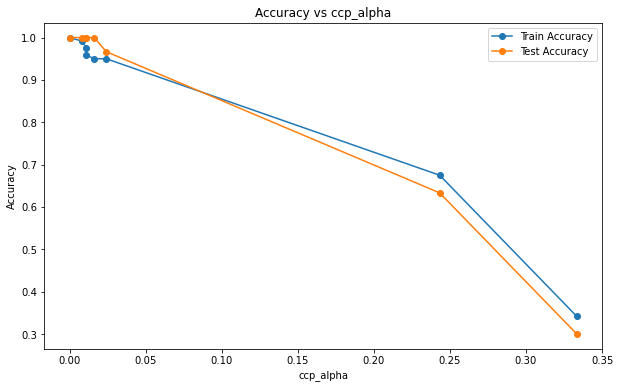

Optimal ccp_alpha: 0.0


In [42]:
path = best_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
train_accuracies = []
test_accuracies = []
for ccp_alpha in ccp_alphas:
    dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ccp_alpha)
    dt_pruned.fit(X_train, y_train)
    train_accuracies.append(dt_pruned.score(X_train, y_train))
    test_accuracies.append(dt_pruned.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_accuracies, marker = 'o', label = 'Train Accuracy')
plt.plot(ccp_alphas, test_accuracies, marker = 'o', label = 'Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha')
plt.legend()
plt.show()
optimal_ccp_alpha = ccp_alphas[np.argmax(test_accuracies)]
print(f"Optimal ccp_alpha: {optimal_ccp_alpha}")

Feature Importance Analysis
•	Extract and plot feature importance values from the trained decision tree.
•	Drop the least important feature and retrain the model. Does accuracy improve or decline?


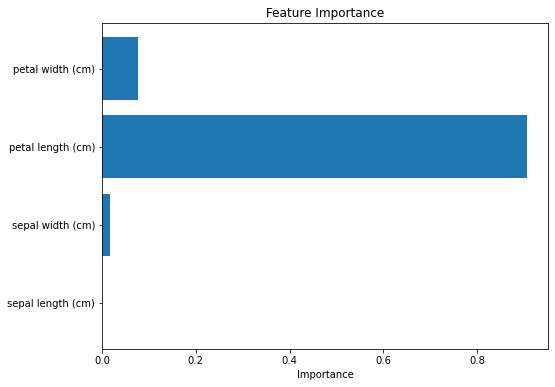

In [43]:
feature_importances = best_model.feature_importances_
feature_names = iris.feature_names
plt.figure(figsize = (8,6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [44]:
least_important_feature_index = np.argmin(feature_importances)
X_train_reduced = np.delete(X_train, least_important_feature_index, axis = 1)
X_test_reduced = np.delete(X_test, least_important_feature_index, axis = 1)
dt_reduced = DecisionTreeClassifier(random_state = 42)
dt_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = dt_reduced.predict(X_test_reduced)
print("Classification report (reduced features): ")
print(classification_report(y_test, y_pred_reduced))
print("Confusion matrix(reduced features): ")
print(confusion_matrix(y_test, y_pred_reduced))

Classification report (reduced features): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix(reduced features): 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
